# 互评作业1：数据探索性分析与数据预处理

# 目录
  
## 2. 选用的数据集2：Consumer & Visitor Insights For Neighborhoods¶

### 2.1 数据可视化和摘要

    数据信息展示

    标称属性数据摘要
    
    数值属性摘要
    
    数据可视化展示

### 2.2 数据缺失值处理
    
    缺失值原因分析
    
    将缺失部分剔除
    
    用高频率值填补缺失值
    
    通过数据对象之间的相似性填补缺失值
    
    对缺失值处理的总结


    

# 选用数据集2：Consumer & Visitor Insights For Neighborhoods 

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pylab
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier


In [2]:
dtype = {'census_block_group': 'object', 'date_range_start': 'int', 'date_range_end':'int',
       'raw_visit_count':'float', 'raw_visitor_count':'float', 'visitor_home_cbgs':'object',
       'visitor_work_cbgs':'object', 'distance_from_home':'float', 'related_same_day_brand':'object',
       'related_same_month_brand':'object', 'top_brands':'object', 'popularity_by_hour':'object',
       'popularity_by_day':'object'}

data = pd.read_csv('data/cbg_patterns.csv', dtype=dtype)

## 2.1 数据可视化和摘要

    数据摘要部分共包括“数据信息展示”、“标称属性数据摘要”、“数值属性数据摘要”、“数据可视化展示”四部分。
    
### 数据信息展示

   **数据集名称:** Consumer & Visitor Insights For Neighborhoods 
   **数据集地址:** https://www.kaggle.com/safegraph/visit-patterns-by-census-block-group
**数据集描述:** 通过分析大量GPS运动数据，SafeGraph得出了CBG的受欢迎程度或到达CBG的距离。
同时还将GPS数据与我们在美国的500万个兴趣点的建筑物占地面积数据集（SafeGraph Places）相结合，以确定对商店或饭店等地点的访问。通过这些访问次数来得出消费者见解，例如在CBG中访问过的顶级品牌（例如麦当劳）。
    数据集中共包括12个字段，分别为census_block_group、date_range_start、date_range_end 、raw_visit_count、raw_visitor_count、visitor_home_cbgs、visitor_work_cbgs、distance_from_home、related_same_day_brand、related_same_month_brand、top_brands、popularity_by_hour、popularity_by_day。

In [3]:
data.info() #数据集概况展示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220734 non-null  object 
 1   date_range_start          220735 non-null  int32  
 2   date_range_end            220735 non-null  int32  
 3   raw_visit_count           220629 non-null  float64
 4   raw_visitor_count         220629 non-null  float64
 5   visitor_home_cbgs         220735 non-null  object 
 6   visitor_work_cbgs         220735 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220735 non-null  object 
 9   related_same_month_brand  220735 non-null  object 
 10  top_brands                220735 non-null  object 
 11  popularity_by_hour        220735 non-null  object 
 12  popularity_by_day         220735 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory us

In [4]:
data.head() #数据集前5行数据展示

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


### 标称属性摘要

   该数据集中的标称属性为唯一代码（census_block_group），因为是唯一代码，所以每个数值出现且仅出现一次。所以频数均为1。

In [5]:
#定义数据频数展示函数
def ab_data(attr_name):
    attr = data[attr_name]
    counts = attr.value_counts() #统计不同类别及出现频率
    print("Colunm name：",attr_name) #属性名称
    print("Different values：",len(counts)) #不同类别个数
    attr_l=counts.to_frame()
    attr_l.rename(columns={attr_name: 'counts'}, inplace=True)
    print(attr_l.iloc[:10])
    plt.bar(np.arange(10), counts.iloc[:10])
    plt.title(attr_name)
    plt.show()

Colunm name： census_block_group
Different values： 220734
              counts
481130192082       1
450570112011       1
360810757013       1
371190060051       1
295101164003       1
150030096032       1
121079506001       1
320239604042       1
482319605002       1
200910535104       1


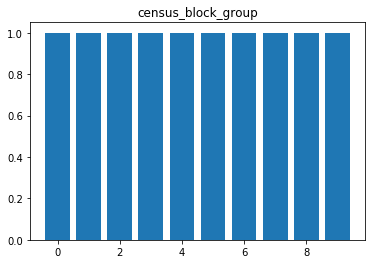

Colunm name： related_same_day_brand
Different values： 73198
                          counts
[]                         35542
["Dunkin' Donuts"]          7010
["starbucks"]               4178
["walmart"]                 3054
["mcdonalds"]               2911
["Wawa"]                    2831
["7-Eleven US"]             2403
["Publix Super Markets"]    2272
["QuikTrip"]                1812
["Kroger"]                  1256


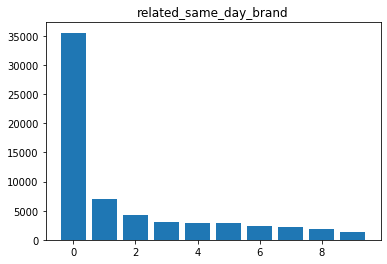

In [6]:
#标称属性的数据频数展示
ab_data('census_block_group')
ab_data('related_same_day_brand')

### 数值属性摘要

   该数据集中的数值属性包括开始时间（date_range_start），结束时间（date_range_end）、专家组访问次数（raw_visit_count）、访问者数量（raw_visitor_count）、距离（distance_from_home）。通过观察数据可以看到开始时间和结束时间均相同，因此不对这两个属性进行分析。
   下面对专家组访问次数（raw_visit_count）、访问者数量（raw_visitor_count）以及距离（distance_from_home）三个数值属性进行最小值、第一四份位数、平均值、第三四分位数、最大值进行就算给出五数概括，并计算缺失值个数。

In [7]:
# 数值数据的五数概括函数及缺失值个数
def data_five(att_n):
    data_r=data[att_n]
    data_min=data_r.min()
    data_max=data_r.max()
    data_1=data_r.quantile(.25)
    data_2=data_r.quantile(.50)
    data_3=data_r.quantile(.75)
    data_n=data_r.isnull().sum()
    print("{}的五数概括为：{}, {}, {}, {}, {}；缺失值个数为：{}".format(att_n,data_min,data_1,data_2,data_3,data_max,data_n))

In [8]:
data_five('raw_visit_count')
data_five('raw_visitor_count')
data_five('distance_from_home')

raw_visit_count的五数概括为：60.0, 17042.0, 30640.0, 56678.0, 7179900.0；缺失值个数为：106
raw_visitor_count的五数概括为：50.0, 3430.0, 6541.0, 13099.0, 6113949.0；缺失值个数为：106
distance_from_home的五数概括为：706.0, 8584.0, 14614.0, 31397.75, 6297845.0；缺失值个数为：217


### 数据可视化展示

通过直方图、q-q图以及盒图检查数据的分布以及离群点。

In [9]:
#绘制直方图函数
def draw_bar(data,att_name):
    col=data[att_name].dropna()
    plt.hist(col,100)
    plt.title(att_name)
    plt.show()
def draw_qq(data,att_name):
    col=data[att_name].dropna()
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()
def draw_box(data,att_name):
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(att_name)
    ax.boxplot(data[att_name].dropna())
    plt.show()

#### 直方图和Q-Q图

raw_visit_count的直方图和Q-Q图如下所示：

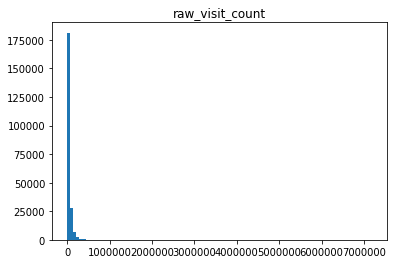

In [10]:
draw_bar(data,'raw_visit_count') #直方图

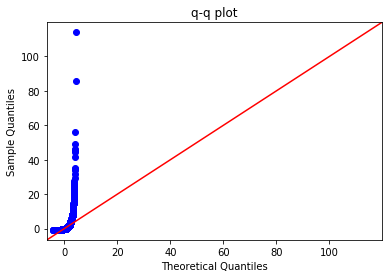

In [11]:
draw_qq(data,'raw_visit_count') #Q-Q图

从直方图和Q-Q图中可以看出raw_visit_count中的数据不满足满足正态分布，分布不均匀。

raw_visitor_count的直方图和Q-Q图如下图所示

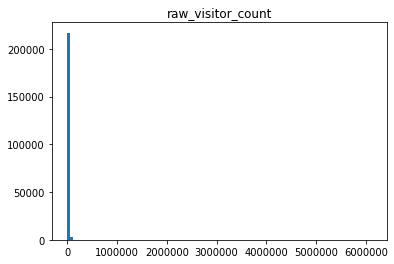

In [12]:
draw_bar(data,'raw_visitor_count') #直方图

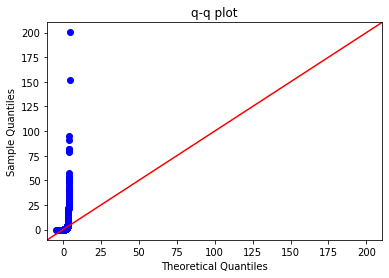

In [13]:
draw_qq(data,"raw_visitor_count") #Q-Q图

从raw_visitor_count的直方图和Q-Q图可以看出raw_visitor_count中的数据不满足正态分布，分布不均匀。

distance_from_home的直方图和Q-Q图如下图所示

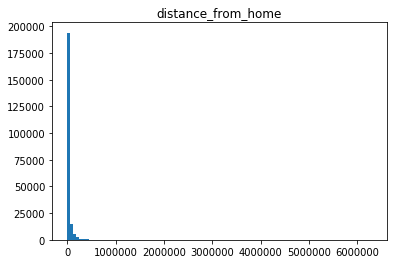

In [14]:
draw_bar(data,'distance_from_home') #直方图

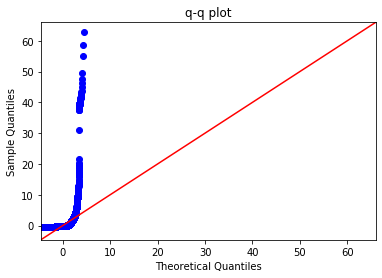

In [15]:
draw_qq(data,"distance_from_home") #Q-Q图

从distance_from_home的直方图和Q-Q图可以看出distance_from_home中的数据不满足正态分布，分布不均匀。

#### 盒图

raw_visit_count的盒图如下图所示


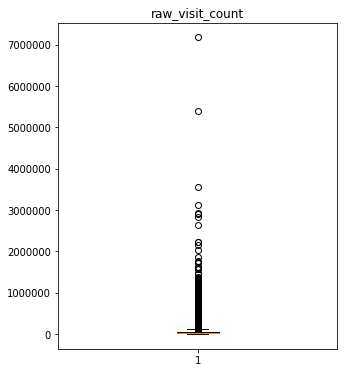

In [16]:
#raw_visit_count的盒图
draw_box(data,'raw_visit_count')

从points的盒图中我们也可以看出数据分布较为均匀，存在四个可能的离群点。

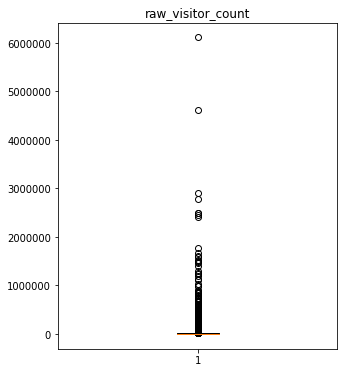

In [17]:
#raw_visitor_count的盒图
draw_box(data,'raw_visitor_count')

从price的盒图中我们同样可以看出数据存在着不平衡，偏向于较小的值，且数据越大，数据点越稀疏。我们可以看到较多的可能离群点，数据越稀疏的区域是离群点的可能性越大。

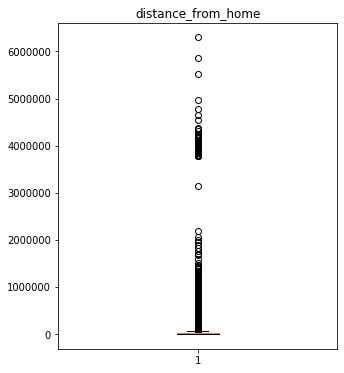

In [18]:
#distance_from_home的盒图
draw_box(data,'distance_from_home')

从distance_from_home的盒图中我们同样可以看出数据存在着不平衡，偏向于较小的值，且数据越大，数据点越稀疏。我们可以看到较多的可能离群点，数据越稀疏的区域是离群点的可能性越大。

## 2.2 数据缺失值处理

在这部分我们将分析数据缺失的原因，并通过缺失部分剔除、用高频率值填补缺失值、通过属性的相关关系填补缺失值

以及通过数据对象之间的相似性填补缺失值四种策略进行缺失值处理，并进行新旧数据集对比。


In [19]:
# 对数据中的缺失值进行分析
data.isna().sum()

census_block_group            1
date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64

#### 缺失值原因分析：####
我们可以看到raw_visit_count、raw_visitor_count、distance_from_home 存在缺失值，它们的含义分别为专家访问次数、看到的唯一访问者数量以及访客到CBG的举例。
从缺失情况和属性含义上我们可以看出raw_visit_count、raw_visitor_count缺失的原因可能是相同的，原因在于未被访问。同时这部分未被访问者的distance_from_home同样缺失。distance_from_home另一个缺失的原因可能是未记录数据。

#### 将缺失部分剔除

In [20]:
data_new=data.dropna()

In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220518 entries, 0 to 220628
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   census_block_group        220518 non-null  object 
 1   date_range_start          220518 non-null  int32  
 2   date_range_end            220518 non-null  int32  
 3   raw_visit_count           220518 non-null  float64
 4   raw_visitor_count         220518 non-null  float64
 5   visitor_home_cbgs         220518 non-null  object 
 6   visitor_work_cbgs         220518 non-null  object 
 7   distance_from_home        220518 non-null  float64
 8   related_same_day_brand    220518 non-null  object 
 9   related_same_month_brand  220518 non-null  object 
 10  top_brands                220518 non-null  object 
 11  popularity_by_hour        220518 non-null  object 
 12  popularity_by_day         220518 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory us

从上面的结果我们可以看到数据集中已经没有缺失的数据集,数据条数为220518条。下面我们通过对新数据集中raw_visit_count的数据摘要的分析探究缺失值去除后对数据集的影响。

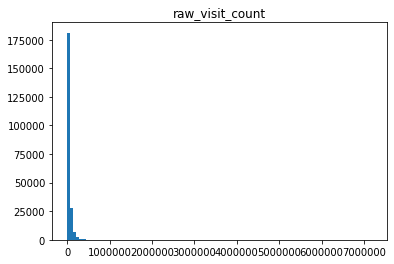

In [22]:
draw_bar(data_new,'raw_visit_count') #新数据


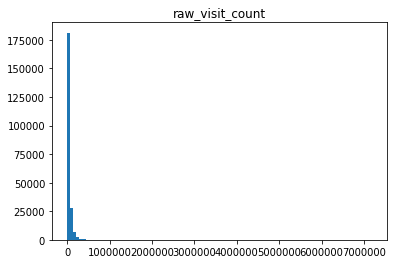

In [23]:
draw_bar(data,'raw_visit_count') #原数据

从直方图上进行观察，数据的分布并没有太大变化，所以通过去除属性raw_visit_count缺失值的方式对数据集的数据分布影响不大。


#### 用高频率值填补缺失值

这里我们以raw_visit_count属性为例。

众数为： 24531.0
新数据直方图：


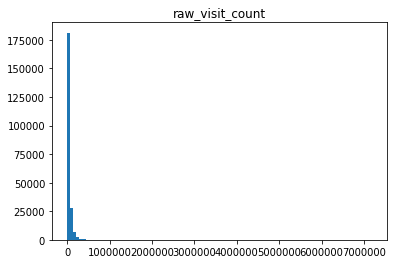

原数据直方图：


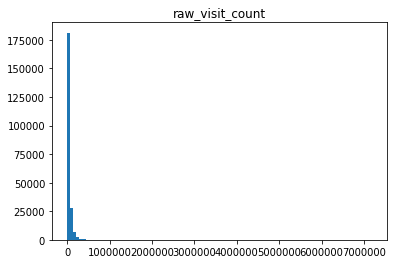

In [24]:
mode = data.mode()['raw_visit_count'][0]
data_h=data.fillna({'raw_visit_count':mode})
print('众数为：',mode)
print("新数据直方图：")
draw_bar(data_h,'raw_visit_count')
print("原数据直方图：")
draw_bar(data,'raw_visit_count')

从直方图的比较来看，对raw_visit_count属性利用高频率值进行缺失值填充对数据分布影响不大。

#### 通过属性的相关关系填补缺失值

首先我们通过相关性矩阵分析属性之间的相关关系。

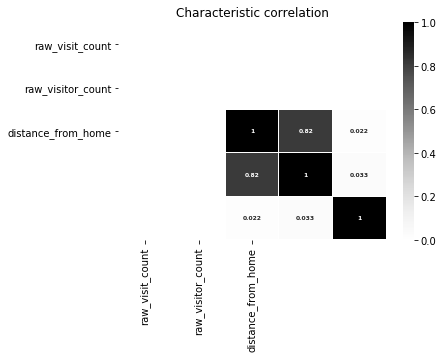

In [25]:
names = ['raw_visit_count', 'raw_visitor_count', 'distance_from_home']
data_r=data.dropna(subset=['raw_visit_count', 'raw_visitor_count', 'distance_from_home'])
correlations = data_r.corr()
fig = plt.figure() 
ax = sns.heatmap(correlations,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})
plt.xticks(np.arange(3)+0.5,names)
plt.yticks(np.arange(3)+0.5,names)
ax.set_title('Characteristic correlation')
plt.savefig('cluster.tif',dpi=300)
plt.show()

   从上图中我们可以看到存在明显相关性的属性是raw_visit_count和raw_visitor_count，而distance_from_home属性和另外两组属性可以看作几乎无关联。因此我们利用相关关系对raw_visit_count和raw_visitor_count属性进行填充。
   从数据中我们可以看到这两个属性均为同时缺失。从属性含义来看，我认为这两个属性可以同时填充0是比较合适的。

新数据直方图：


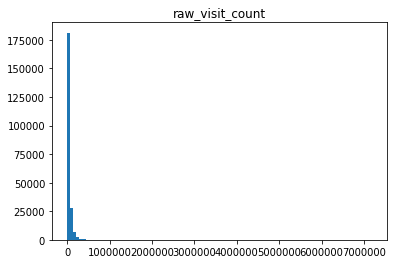

原数据直方图：


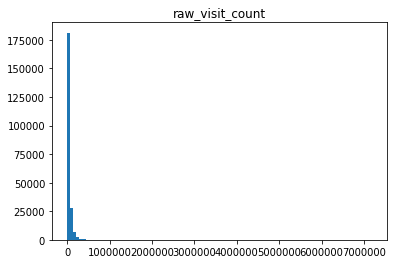

In [26]:
data_r1=data.fillna({'raw_visit_count':0})
print("新数据直方图：")
draw_bar(data_h,'raw_visit_count')
print("原数据直方图：")
draw_bar(data,'raw_visit_count')

从直方图看，对属性raw_visit_count缺失值的填充同样影响较小。

#### 通过数据对象之间的相似性填补缺失值

通过对数据缺失值的分析，distance_from_home属性可以利用数据对象之间的相似性进行缺失值的填充，但是通过上面的相关性分析可以看出distance_from_home和另外两组数值属性关联性不强，所以对利用数据对象之间的相似性进行缺失值填充意义不大。

#### 对缺失值处理的总结####

从以上新旧数据集的数据分布对比来看，由于该数据集分布并不均匀并且缺失数据个数较整体数据集个数少很多，因此，对于这个数据集来说，缺失数据集的处理对于最终的结果影响不大，并且从缺失值的特点来看，我觉的在后续处理的时候可以将缺失值直接删除。